# Problème 1 : Suites complexes

On appelle **suites complexes** des suites dont les valeurs sont des nombres complexes. Tout comme les suites réelles, les suites complexes peuvent **converger** vers une limite ou ne pas converger. 

La définition de la convergence pour les suites complexes est la même que pour les suites réelles, au remplacement près de la notion de valeur absolue par celle de **module**. On dit qu'une suite complexe $(u_n)_{n\in \mathbb{N}}$ converge vers une limite $l \in \mathbb{C}$ si pour tout $\epsilon > 0$, il existe un rang $N$ tel que :
$$
\forall n \ge N,\quad |u_n - l | \le \epsilon,
$$
où $|\cdot|$ désigne le module.

**L'objectif de ce problème est d'explorer la convergence de quelques suites complexes (définies par des relations de récurrence) à l'aide de l'outil informatique.**

Dans ce problème, nous serons évidemment amenés à faire des calculs sur des nombres complexes. Pour cela, nous utiliserons le type natif `complex` qui permet de représenter et de manipuler les nombres complexes (voir le document d'accompagnement correspondant sur la page du cours).

Nous serons également amenés à produire des représentations graphiques de nombres complexes dans le **plan complexe**. On rappelle qu'un nombre complexe est représenté graphiquement dans le plan complexe par un point dont l'abscisse est sa partie réelle et l'ordonnée sa partie imaginaire. Pour dessiner des points dans un plan, nous utiliserons le module `pyplot` de la bibliothèque `Matplotlib` (voir le document d'accompagnement correspondant sur la page du cours).

## A. Une première famille de suites complexes

Nous considérons les suites complexes $(z_n)_{n\in\mathbb{N}}$ vérifiant la relation de récurrence
$$
z_{n+1}=z_n-\frac{z_n^3 - 1}{3 z_n^2}. \qquad(A)
$$

Nous souhaitons étudier la convergence de ces suites en fonction de la valeur initiale choisie.

**Remarque.** Il n'est pas garanti que ces suites soient bien définies pour n'importe quelle valeur initiale. En effet, la définition de $z_{n+1}$ implique une division par $3 z_n^2$. Donc si une telle suite prend la valeur $0$ à un rang donné, elle n'est plus définie pour les rangs suivants. Toutefois, en pratique, ces suites sont bien définies pour la plupart des valeurs initiales.

### A.1. Limites possibles

- Ecrire une fonction `suite` qui prend en paramètres un nombre entier `n` et un nombre complexe `z0` et renvoie la valeur au rang `n` de la suite récurrente de type $(A)$ initialisée avec la valeur `z0`.

In [1]:
def suite(n, z0):
    if n == 0:
        return z0
    else:
        return suite(n - 1, z0 - ((z0 ** 3) - 1) / (3 * z0 ** 2))

- A l'aide de la fonction `suite`, calculer $z_{5}$ pour la suite $(z_n)_{n\in\mathbb{N}}$ de type $(A)$ initialisée avec $z_0 = 1 + 2i$.

In [2]:
suite(5, complex(1, 2))

(3.356632969269531+6.405690179474357j)

* En expérimentant avec la fonction `suite`, conjecturer les limites possibles pour les suites de type $(A)$. Indication : il y a 3 limites possibles (qu'on désignera par la suite comme $\alpha_1$, $\alpha_2$, $\alpha_3$).

In [3]:
suite(100, 2)
suite(100, complex(1, 2))
suite(100, complex(1, -2))
suite(100, complex(-1, 2))
suite(100, complex(-1, -2))

(-0.5-0.8660254037844386j)

$\alpha_1 \approx 1$

$\alpha_2 \approx -0.5 + 0.8i $

$\alpha_3 \approx -0.5 - 0.8i $

* Calculer le module des valeurs trouvées pour $\alpha_1$, $\alpha_2$, $\alpha_3$.

In [4]:
alpha1 = 1
alpha2 = complex(-0.5, 0.8)
alpha3 = complex(-0.5, -0.8)

print(abs(alpha1))
print(abs(alpha2))
print(abs(alpha3))

1
0.9433981132056605
0.9433981132056605


* Représenter les nombres $0$, $\alpha_1$, $\alpha_2$, $\alpha_3$ dans le plan complexe (avec un repère orthonormé) en utilisant le module `pyplot`.

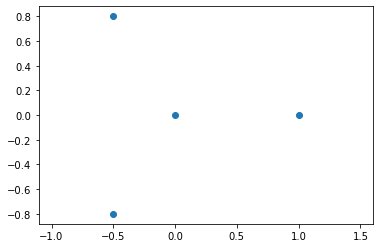

In [5]:
import matplotlib.pyplot as plt

x = [0, 1, -0.5, -0.5]
y = [0, 0, 0.8, -0.8]
plt.plot(x, y, marker='o', linestyle='')
plt.axis('equal')
plt.show()

* On note respectivement $0$, $M_1$, $M_2$, $M_3$ les points d'affixe $0$, $\alpha_1$, $\alpha_2$, $\alpha_3$. Au vu de la représentation graphique, quelle semble être la mesure des angles $\widehat{M_1OM_2}$, $\widehat{M_1OM_3}$, $\widehat{M_2OM_3}$ ?

$\widehat{M_1OM_2}$ = 120°,
$\widehat{M_1OM_3}$ = 120°,
$\widehat{M_2OM_3}$ = 120° 

* Au vu des éléments précédents, conjecturer les valeurs exactes de $\alpha_1$, $\alpha_2$, $\alpha_3$ (sous forme cartésienne et exponentielle).

$\alpha_1 = e^0 = 1$

$\alpha_2 = e^{i2/3\Pi} = -\sqrt{1}/2 + i\sqrt{3}/2 $

$\alpha_3 = e^{i4/3\Pi} = -\sqrt{1}/2 - i\sqrt{3}/2  $

### A.2. Algorithme pour déterminer la limite d'une suite de type $(A)$

Nous proposons l'algorithme suivant pour déterminer la limite d'une suite $(z_n)_{n\in\mathbb{N}}$ de type $(A)$.


*On calcule successivement les termes de la suite à partir de la valeur initiale.
Pour chaque nouveau terme, on calcule l'écart en module entre ce terme et les limites possibles $\alpha_1$, $\alpha_2$, $\alpha_3$.
Si l'écart avec une de ces limites est inférieur à une certaine tolérance (fixée à l'avance), on considère que la suite converge vers cette limite et on renvoie l'indice de cette limite (1, 2 ou 3).
Si, arrivée à un certain rang (fixé à l'avance), la suite ne s'est jamais approchée suffisamment d'une des limites possibles, on considère que la suite ne converge pas et on renvoie `None`. Si la suite s'avère non définie à partir d'un certain rang (voir remarque au tout début de cette partie), on renvoie également `None`.*

Notons que cet algorithme ne fournit pas à coup sûr le bon résultat. Mais, en choisissant une tolérance suffisamment petite et un rang d'arrêt suffisamment grand, on peut espérer qu'il fournisse le bon résultat dans la plupart des cas.

- Ecrire une fonction `limite` qui détermine la limite d'une suite $(z_n)_{n\in\mathbb{N}}$ de type $(A)$ en utilisant l'algorithme décrit ci-dessus. Cette fonction prendra les paramètres suivants : `z0`, la valeur initiale de la suite ; `tol`, la tolérance pour décider de la convergence ; `nmax`, le rang d'arrêt.

Pour traiter le cas où la suite n'est pas définie, on pourra utiliser une instruction `try` au moment du calcul du nouveau terme de la suite.

```py
try:
    z = z - (z**3 - 1)/(3*z**2)
except:
    return None
```

Avec le code ci-dessus, l'interpréteur Python effectue l'instruction `z = z - (z**3 - 1)/(3*z**2)`. Si cette instruction déclenche une erreur (une division par zéro par exemple), la fonction renvoie `None`. Sinon, l'exécution poursuit son cours.

In [6]:
import math
alpha1 = 1
alpha2 = complex(- math.sqrt(1) / 2, math.sqrt(3) / 2)
alpha3 = complex(- math.sqrt(1) / 2, - math.sqrt(3) / 2)

def limite(z0, tol, nmax):
    for i in range(nmax):
        try:
            z0 = z0 - (z0 ** 3 - 1) / (3 * z0 ** 2)
        except:
            return None
        if abs(alpha1 - z0) <= tol:
            return 1
        elif abs(alpha2 - z0) <= tol:
            return 2
        elif abs(alpha3 - z0) <= tol:
            return 3
    return None

* Tester la fonction `limite` sur quelques exemples.

In [7]:
print(limite(0, 0.001, 100))
print(limite(complex(1, 2), 0.001, 100))
print(limite(complex(-1, 2), 0.001, 100))
print(limite(complex(-1, -2), 0.001, 100))

None
1
2
3


### A.3. Représentation graphique des bassins d'attraction

On appelle **bassin d'attraction** de la limite $\alpha_i$ l'ensemble des valeurs initiales pour lesquelles les suites de type $(A)$ convergent vers $\alpha_i$.

Nous souhaitons obtenir une représentation graphique (dans le plan complexe) des bassins d'attraction des limites $\alpha_1$, $\alpha_2$, $\alpha_3$. Pour cela, nous proposons la méthode suivante.

*On choisit une fenêtre rectangulaire du plan complexe. On parcourt l'ensemble de points d'une grille (suffisamment fine) couvrant cette fenêtre. Pour chacun de ces points, on détermine la limite de la suite de type $(A)$ initialisée avec le nombre complexe associé. Enfin, on affiche les points de la grille avec une couleur différente selon le bassin d'attraction auquel appartiennent les nombres complexes associés.*

- Pour commencer, écrire une fonction `grille` qui trace une grille de points couvrant une fenêtre rectangulaire du plan (avec un repère orthonormé). Cette fonction prendra les paramètres suivants :
    * `xmin` et `ymin`, les coordonnées du point en bas à gauche de la fenêtre ;
    * `xmax` et `ymax`, les coordonnées du point en haut à droite de la fenêtre ;
    * `Nx` et `Ny`, le nombre de points dans chaque direction de la grille.
le nombre de points dans chaque direction de la grille. Pour ce tracé, on utilisera le module `pyplot`(voir le document d'accompagnement sur la page du cours).

Voilà par exemple la grille attendue lorsqu'on exécute `grille(-1, -2, 3, 2, 10, 20)`.

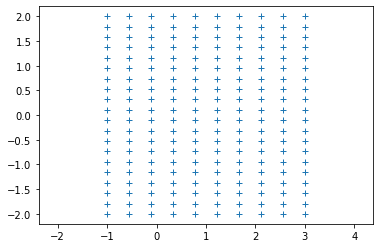

Indication : lire le document d'accompagnement sur les grilles 1D.

In [8]:
def grille(xmin, ymin, xmax, ymax, Nx, Ny):
    lst_x = []
    lst_y = []
    hx = (xmax - xmin) / (Nx - 1)
    hy = (ymax - ymin) / (Ny - 1)
    
    for i in range(Nx):
        for j in range(Ny):
            lst_x.append(xmin + i * hx)
            lst_y.append(ymin + j * hy)

    plt.plot(lst_x, lst_y, marker='+', linestyle='', color='blue')
    plt.axis('equal')
    plt.show()

* Tester la fonction `grille`. 

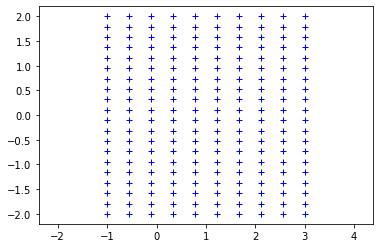

In [9]:
grille(-1, -2, 3, 2, 10, 20)

- En reprenant la structure de la fonction `grille`, écrire une fonction `bassins` qui trace une représentation graphique des bassins d'attraction (selon la méthode de parcours d'une grille décrite plus haut). Cette fonction prendra comme paramètres les mêmes que la fonction `grille`, ainsi qu'une tolérance et un rang d'arrêt pour déterminer les limites. Indication : pour le tracé des points, utiliser la marque pixel (`marker=','`) afin d'éviter les chevauchements entre les marques des points .

In [10]:
def bassins(xmin, ymin, xmax, ymax, Nx, Ny, tol, rang):
    lst_colors = ['purple', 'blue', 'red']
    lst_x = [[], [], []]
    lst_y = [[], [], []]
    hx = (xmax - xmin) / (Nx - 1)
    hy = (ymax - ymin) / (Ny - 1)
    
    for i in range(Nx):
        for j in range(Ny):   
            lim = limite(complex(xmin + i * hx, ymin + j * hy), tol, rang)
            if lim != None:
                lst_x[lim - 1].append(xmin + i * hx)
                lst_y[lim - 1].append(ymin + j * hy)
            
    for k in range(len(lst_colors)):
        plt.plot(lst_x[k], lst_y[k], marker=',', linestyle='', color=lst_colors[k])
        
    plt.axis('equal')
    plt.show()

* Tracer une représentation (la plus précise possible) des bassins d'attraction sur la fenêtre $(-2, -2)$-$(2, 2)$, c'est-à-dire la fenêtre dont le point en bas à gauche est $(-2, -2)$ et le point en haut à droite est $(2, 2)$.

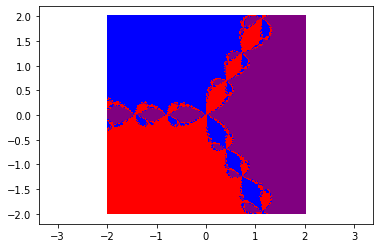

In [11]:
bassins(-2, -2, 2, 2, 350, 350, 0.001, 100)

* Tracer une représentation (la plus précise possible) des bassins d'attraction sur la fenêtre $(0.06, 0.46)$-$(0.11, 0.51)$.

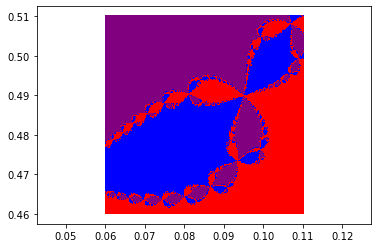

In [12]:
bassins(0.06, 0.46, 0.11, 0.51, 350, 350, 0.001, 100)

* Commenter l'aspect des bassins d'attraction.

La première représentation est un fractal: montrant une répartition en trois "régions" en fonction de la limite $\alpha_1$, $\alpha_2$ ou $\alpha_3$ en laquelle la suite converge.

La deuxième représentation permet de voir le fractal de plus près.

### A.4. Limites possibles (approche théorique)

Dans la section A.1, nous avons conjecturé les limites possibles des suites de type $(A)$ grâce à des expérimentations numériques. Nous proposons ici une approche théorique pour déterminer ces limites. 

On suppose qu'une suite de type $(A)$ converge vers une limite $l$ (on admet que cette limite ne peut pas être nulle).

Alors il est évident que $\displaystyle \lim_{n \rightarrow + \infty} z_{n+1} = l$.

Et de la relation de récurrence des suites de type $(A)$, on tire l'égalité $\displaystyle 
\lim_{n \rightarrow + \infty} z_{n+1} = \lim_{n \rightarrow + \infty} \left( z_n-\frac{z_n^3 - 1}{3 z_n^2} \right).
$

Or $\displaystyle \lim_{n \rightarrow + \infty} \left( z_n - \frac{z_n^3 - 1}{3 z_n^2} \right)  =  l - \frac{l^3-1}{3l^2}.$

D'où : $\displaystyle l = l - \frac{l^3-1}{2l^2}.$


* En utilisant les propriétés des limites de suites (qui sont les mêmes pour les suites complexes que pour les suites réelles), justifier que $\displaystyle \lim_{n \rightarrow + \infty} \left( z_n-\frac{z_n^3 - 1}{3 z_n^2} \right)  =  l - \frac{l^3-1}{3l^2}.$



$\lim_{n \rightarrow + \infty} z_{n+1} = l$ donc $\lim_{n \rightarrow + \infty} z_n = l$ à partir d'un certain rang

De plus, $\displaystyle 
\lim_{n \rightarrow + \infty} z_{n+1} = \lim_{n \rightarrow + \infty} \left( z_n-\frac{z_n^3 - 1}{3 z_n^2} \right)$

Donc 

$\lim_{n \rightarrow + \infty} z_{n+1} = \lim_{n \rightarrow + \infty} z_n - \frac{\lim_{n \rightarrow + \infty} z_n^3 -1}{\lim_{n \rightarrow + \infty} 3 z_n^2} 
\Leftrightarrow \lim_{n \rightarrow + \infty} z_{n+1} = \lim_{n \rightarrow + \infty} z_n - \frac{\lim_{n \rightarrow + \infty} z_n^3 -1}{\lim_{n \rightarrow + \infty} 3 z_n^2} $

De plus, $\displaystyle l = l - \frac{l^3-1}{2l^2}$

On a donc $\lim_{n \rightarrow + \infty} z_n - \frac{\lim_{n \rightarrow + \infty} z_n^3 -1}{\lim_{n \rightarrow + \infty} 3 z_n^2} = l - \frac{l^3-1}{2l^2}$

Ainsi, on a bien $\displaystyle \lim_{n \rightarrow + \infty} \left( z_n-\frac{z_n^3 - 1}{3 z_n^2} \right)  =  l - \frac{l^3-1}{3l^2}.$

* De la relation $\displaystyle l = l - \frac{l^3-1}{2l^2}$, déduire les limites possibles des suites de type $(A)$.

$\frac{l^3-1}{2l^2} = 0$

avec $l$ différent de 0, $l^3 - 1 = 0 \Leftrightarrow l^3 = 1$

De plus, pour k appartenant à {0, 1, ..., n-1}, $e^{2k\pi/n} z_n$ avec n = 3.

Donc les limites sont: $e^0 = 1, e^{2i\pi/3}$ et $e^{4i\pi/3}$.

### A.5. Symétries entre bassins d'attraction

Nous observons que les bassins d'attraction ont la même forme à une rotation près. Chaque bassin est l'image d'un autre bassin par une rotation d'angle $2\pi/3$ ou $-2\pi/3$ (autour de l'origine).

Dans cette section, nous allons démontrer (partiellement) ce résultat.

On rappelle que l'image d'un point d'affixe $z$ par la rotation d'angle $\theta$ (autour de l'origine) est le point d'affixe $e^{i\theta}z$.

Soit $(z_n)_{n\in\mathbb{N}}$ une suite de type $(A)$.
Soit $(w_n)_{n\in\mathbb{N}}$ la suite de type $(A)$ initialisée avec la valeur $e^{2i\pi/3} z_0$.

* Montrer par récurrence que, pour tout $n\in \mathbb{N}$, $w_n = e^{2i\pi/3} z_n$.

Par récurrence, montrons que $n\in \mathbb{N}$, $w_n = e^{2i\pi/3} z_n$:

- Initialisation: On sait que $w_0 =  e^{2i\pi/3} z_0$ d'après l'énoncé
    
    
- Hérédité:On suppose que $w_n = e^{2i\pi/3} z_n$ est vrai. Montrons que $w_{n+1} = e^{2i\pi/3} z_{n+1}$:

    $w_n = e^{2i\pi/3} z_n$
    
    $ \Leftrightarrow w_n - \frac{w_n^3 - 1}{3 w_n^2} = e^{2i\pi/3} z_n - \frac{w_n^3 - 1}{3 w_n^2}$
    
    $ \Leftrightarrow w_{n+1} = e^{2i\pi/3} z_n - \frac{{(e^{2i\pi/3}z_n)}^3 -1}{3 {(e^{2i\pi/3}z_n})^2}$
    
    $ \Leftrightarrow w_{n+1} = e^{2i\pi/3} z_n - e^{2i\pi/3} \frac{z_n^3}{3 z_n^2} - \frac{(e^{2i\pi/3})^{-2}}{3 z_n^2}$
    
    $ \Leftrightarrow w_{n+1} = e^{2i\pi/3} z_n - e^{2i\pi/3} \frac{z_n^3}{3 z_n^2} - \frac{(e^{2i\pi/3})(e^{-6i\pi/3})}{3 z_n^2}$
    
    $ \Leftrightarrow w_{n+1} = e^{2i\pi/3} z_n - e^{2i\pi/3} \frac{z_n^3}{3 z_n^2} - \frac{(e^{2i\pi/3})1}{3 z_n^2}$
    
    $\Leftrightarrow w_{n+1} = e^{2i\pi/3} z_n - e^{2i\pi/3} \frac{z_n^3}{3 z_n^2} - \frac{e^{2i\pi/3}}{3 z_n^2}$
    
    $\Leftrightarrow w_{n+1} = (e^{2i\pi/3}) (z_n - \frac{z_n^3 - 1}{3 z_n^2})$
    
    $\Leftrightarrow w_{n+1} = (e^{2i\pi/3}) z_{n+1}$       
    
    Donc $w_{n+1} = e^{2i\pi/3} z_{n+1}$
    
Finalement, $w_n = e^{2i\pi/3} z_n$.
    


* On suppose que $(z_n)_{n\in\mathbb{N}}$ converge vers $\alpha_1$ et donc que $z_0$ appartient au bassin d'attraction de $\alpha_1$. A quel bassin d'attraction appartient $e^{2i\pi/3} z_0$ ?

On sait que:

$\alpha_1 = e^0 = 1$

$\alpha_2 = e^{i2/3\Pi} = -\sqrt{1}/2 + i\sqrt{3}/2 $

$\alpha_3 = e^{i4/3\Pi} = -\sqrt{1}/2 - i\sqrt{3}/2  $

$\displaystyle \lim_{n \rightarrow + \infty} z_n = \alpha_1$ donc $z_0\in\alpha_1$

$w_n = e^{i2/3\Pi} z_n$

Donc:

$w_0 = e^{i2/3\Pi} z_0$

$ \Leftrightarrow w_0 = e^{i2/3\Pi} * 1 = e^{i2/3\Pi} = \alpha_2$

Donc $e^{i2/3\Pi} z_0$ appartient à $\alpha_2$.


* Conclure. (Qu'avons nous démontré ?)

On a bien démontré que chaque bassin est l'image d'un autre bassin par une rotation d'angle  2𝜋/3  ou  −2𝜋/3.

## B. Une autre famille de suites complexes

Nous considérons maintenant les suites complexes $(z_n)_{n\in\mathbb{N}}$ vérifiant la relation de récurrence
$$
z_{n+1}=z_n - \frac{a z_n^2 + bz_n +c}{2 a z_n + b}, \qquad(B)
$$
où $a$, $b$ et $c$ sont des nombres complexes donnés.

### B.1. Un premier cas particulier

Nous considérons d'abord le cas particulier suivant : les suites complexes $(z_n)_{n\in\mathbb{N}}$ vérifiant la relation de récurrence
$$
z_{n+1}=z_n - \frac{z_n^2 - 2i}{2 z_n}. \qquad(B_1)
$$

* En reprenant l'approche théorique de la section A.4, déterminer les limites possibles des suites de type $(B_1)$. Indication : pour la résolution d'équations du second degré à coefficients complexes, voir cours de L1 ou document d'accompagnement sur les nombres complexes.

$\beta_1 = 1 + i$

$\beta_2 = -1 - i$

* En reprenant l'approche des sections A.2 et A.3, représenter les bassins d'attraction. Ajouter sur cette représentation des bassins, la représentation des points correspondant aux limites possibles.

None
1
2


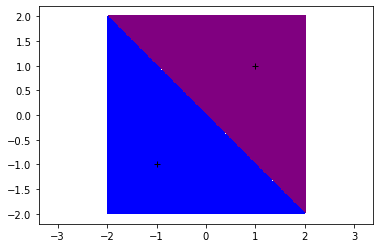

In [13]:
beta1 = complex(1, 1)
beta2 = complex(-1, -1)

def limite2(z0, tol, nmax):
    for i in range(nmax):
        try:
            z0 = z0 - (z0 ** 2 - complex(0,2)) / (2 * (z0))
        except:
            return None
        if abs(beta1 - z0) <= tol:
            return 1
        elif abs(beta2 - z0) <= tol:
            return 2
    return None

def bassins2(xmin, ymin, xmax, ymax, Nx, Ny, tol, rang):
    lst_colors = ['purple', 'blue']
    lst_x = [[], []]
    lst_y = [[], []]
    hx = (xmax - xmin) / (Nx - 1)
    hy = (ymax - ymin) / (Ny - 1)
    
    for i in range(Nx):
        for j in range(Ny):   
            lim = limite2(complex(xmin + i * hx, ymin + j * hy), tol, rang)
            if lim != None:
                lst_x[lim - 1].append(xmin + i * hx)
                lst_y[lim - 1].append(ymin + j * hy)

    for k in range(len(lst_colors)):
        plt.plot(lst_x[k], lst_y[k], marker=',', linestyle='', color=lst_colors[k])
        
    plt.plot(1, 1, marker='+', linestyle='', color="black")
    plt.plot(-1, -1, marker='+', linestyle='', color="black")
    plt.axis('equal')
    plt.show()

print(limite2(0, 1, 10))
print(limite2(complex(1, 2), 0.001, 100))
print(limite2(complex(-1, -2), 0.001, 100))
bassins2(-2, -2, 2, 2, 350, 350, 0.001, 100)

### B.2. Un deuxième cas particulier

Nous considérons maintenant le cas des suites complexes $(z_n)_{n\in\mathbb{N}}$ vérifiant la relation de récurrence
$$
z_{n+1}=z_n - \frac{z_n^2 - z + 1 +i}{2 z_n - 1}. \qquad(B_2)
$$

* Mêmes questions que dans la section B.1.

$\gamma_1 = 1 - i$

$\gamma_2 = i$

2
1


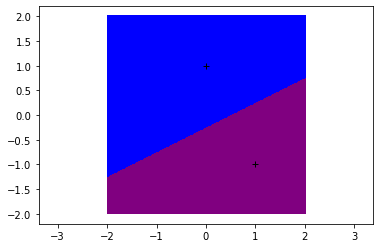

In [14]:
gamma1 = complex(1, -1)
gamma2 = complex(0, 1)

def limite3(z0, tol, nmax):
    for i in range(nmax):
        try:
            z0 = z0 - (z0 ** 2 - z0 + complex(1, 1)) / (2 * z0 - 1)
        except:
            return None
        if abs(gamma1 - z0) <= tol:
            return 1
        elif abs(gamma2 - z0) <= tol:
            return 2
    return None

def bassins3(xmin, ymin, xmax, ymax, Nx, Ny, tol, rang):
    lst_colors = ['purple', 'blue']
    lst_x = [[], []]
    lst_y = [[], []]
    hx = (xmax - xmin) / (Nx - 1)
    hy = (ymax - ymin) / (Ny - 1)
    
    for i in range(Nx):
        for j in range(Ny):   
            lim = limite3(complex(xmin + i * hx, ymin + j * hy), tol, rang)
            if lim != None:
                lst_x[lim - 1].append(xmin + i * hx)
                lst_y[lim - 1].append(ymin + j * hy)

    for k in range(len(lst_colors)):
        plt.plot(lst_x[k], lst_y[k], marker=',', linestyle='', color=lst_colors[k])
        
    plt.plot(1, -1, marker='+', linestyle='', color="black")
    plt.plot(0, 1, marker='+', linestyle='', color="black")
    plt.axis('equal')
    plt.show()

print(limite3(complex(-1, 2), 0.001, 100))
print(limite3(complex(-1, -2), 0.001, 100))
bassins3(-2, -2, 2, 2, 350, 350, 0.001, 100)

### B.3. Cas général

* Au vu des deux cas particuliers précédents, conjecturer la forme des bassins d'attraction des suites de type $(B)$.

On peut conjecturer que la représentation ressemblera à une croix répartie en 4 "régions" en fonction de la limite $\beta_1, \beta_2, \gamma_1$ ou $\gamma_2$ en laquelle la suite converge.

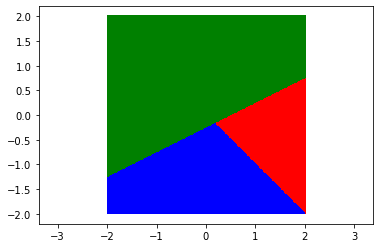

In [ ]:
def bassins4(xmin, ymin, xmax, ymax, Nx, Ny, tol, rang):
    lst_colors = ['purple', 'blue', 'red', 'green']
    lst_betax = [[], []]
    lst_betay = [[], []]
    lst_gammax = [[], []]
    lst_gammay = [[], []]
    hx = (xmax - xmin) / (Nx - 1)
    hy = (ymax - ymin) / (Ny - 1)
    
    for i in range(Nx):
        for j in range(Ny):   
            lim1 = limite2(complex(xmin + i * hx, ymin + j * hy), tol, rang)
            lim2 = limite3(complex(xmin + i * hx, ymin + j * hy), tol, rang)
            if lim1 != None:
                lst_betax[lim1 - 1].append(xmin + i * hx)
                lst_betay[lim1 - 1].append(ymin + j * hy)
            if lim2 != None:
                lst_gammax[lim2 - 1].append(xmin + i * hx)
                lst_gammay[lim2 - 1].append(ymin + j * hy)

    for k in range(len(lst_colors)//2):
        plt.plot(lst_betax[k], lst_betay[k], marker=',', linestyle='', color=lst_colors[k])
        plt.plot(lst_gammax[k], lst_gammay[k], marker=',', linestyle='', color=lst_colors[k + 2])

    plt.axis('equal')
    plt.show()
    
bassins4(-2, -2, 2, 2, 350, 350, 0.001, 100)